<a href="https://colab.research.google.com/github/Aditya-y9/ApnaMakaan/blob/main/Fitness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from shapely.geometry import Polygon

# Centroid

In [ ]:
def centroid(room):
    x1 = room['position'][0]
    y1 = room['position'][1]
    x2 = room['position'][0] + room['size'][0]
    y2 = room['position'][1]
    x3 = room['position'][0] + room['size'][0]
    y3 = room['position'][1] + room['size'][1]
    x4 = room['position'][0]
    y4 = room['position'][1] + room['size'][1]
    vertices = [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
    n = len(vertices)
    A = 0
    Cx = 0
    Cy = 0

    for i in range(n):
        x_i, y_i = vertices[i]
        x_ip1, y_ip1 = vertices[(i + 1) % n]
        cross_product = (x_i * y_ip1) - (x_ip1 * y_i)
        A += cross_product
        Cx += (x_i + x_ip1) * cross_product
        Cy += (y_i + y_ip1) * cross_product

    A *= 0.5
    Cx /= (6 * A)
    Cy /= (6 * A)

    return (Cx, Cy)


Centroid: (46.0, 95.5)


# Fitness based on Area

In [ ]:
# input like [{'name': 'By_laws', 'position": (60.8,
# 108.8), 'size': (19.2, 11.2)), {'name': 'Living Room', 'position': (12,
# 71), 'size': (68, 49)}, {'name': 'Passage', 'position': (0, 25), 'size': (12, 81)}, (name: Kitchen, position: (0, 51), size: (12, 25)), {'name': 'Bedroom1', 'position': (12, 12), 'size': (30, 30)}, ('name':
# 'Washroom', 'position': (32, 32), 'size': (7.5, 7)}]

def calculate_area_fitness(room):
  # input : {'name': 'Living Room', 'position': (12, 71), 'size': (68, 49)}
  x1 = room['position'][0]
  y1 = room['position'][1]
  x2 = room['position'][0] + room['size'][0]
  y2 = room['position'][1] + room['size'][1]
  coordinates = [(x1, y1), (x2, y1), (x2, y2), (x1, y2)]
  polygon = Polygon(coordinates)
  area = polygon.area
  return area

# Fitness based on Irregularity

In [ ]:
import numpy as np

def irregularity(room_centroid, plot_vertices):

    absolute_distances = []
    for vertex in plot_vertices:
        distance = np.sqrt((room_centroid[0] - vertex[0])**2 + (room_centroid[1] - vertex[1])**2)
        absolute_distances.append(distance)

    mean_distance = np.mean(absolute_distances)

    irregularity = 0
    for distance in absolute_distances:
        irregularity += np.abs(distance - mean_distance)
    return irregularity


# Gradient Penalty for good and bad designs

In [ ]:
import math

def calculate_distance_fitness(plot_centroid, figure_centroid, distance):
    plot_x, plot_y = plot_centroid
    figure_x, figure_y = figure_centroid


    distance_penalty = distance / max_distance


    plot_width = max_plot_width
    plot_height = max_plot_height
    corner_preference = 1.0


    min_x_distance_to_corner = min(figure_x, plot_width - figure_x)
    min_y_distance_to_corner = min(figure_y, plot_height - figure_y)

    corner_penalty = 1.0 - (min_x_distance_to_corner + min_y_distance_to_corner) / (plot_width + plot_height)


    fitness = (1 - corner_preference) * (1 - distance_penalty) + corner_preference * (1 - corner_penalty)

    return fitness



Fitness score: 0.09999999999999998


# Simple Gradient

In [ ]:
def calculate_fitness_gradient(distance):

    max_distance = 20


    if distance <= max_distance:
        fitness = distance / max_distance
    else:
        fitness = 0

    return fitness

# Boundary Overlap Penalty

In [ ]:
from shapely.geometry import Polygon, Point
from shapely.geometry.polygon import orient

def calculate_area(vertices):
    # Calculate area of polygon using shoelace formula
    n = len(vertices)
    area = 0.0
    for i in range(n):
        x1, y1 = vertices[i]
        x2, y2 = vertices[(i + 1) % n]
        area += x1 * y2 - y1 * x2
    return abs(area) / 2.0

def calculate_boundary_overlap_penalty(room_vertices, plot_vertices):

    room_polygon = Polygon(room_vertices)
    plot_polygon = Polygon(plot_vertices)


    room_area = room_polygon.area
    plot_area = plot_polygon.area


    intersection_area = room_polygon.intersection(plot_polygon).area


    if room_area == intersection_area:
        boundary_overlap_penalty = 0.0
    else:

        area_outside_plot = room_area - intersection_area


        boundary_overlap_penalty = area_outside_plot / room_area

    return boundary_overlap_penalty

In [ ]:

def calculate_fitness(self, room_list):
  pass

# Input

In [ ]:
room_list = [{'name': 'Living Room', 'position': (12, 71), 'size': (68, 49)}]

In [ ]:
calculate_area_fitness(room_list[0])

3332.0

In [ ]:
print(room_list[0])
Cx, Cy = centroid(room_list[0])

{'name': 'Living Room', 'position': (12, 71), 'size': (68, 49)}


# Generate and Visualize the Plot

Living room - Length: 136, Breadth: 85
Vertex: (340, 290), Length: 136, Breadth: 85
Passage - Length: 98, Breadth: 58
New Vertex: (241, 320), New Length: 98, New Breadth: 58
Kitchen - Length: 105, Breadth: 55
New Vertex: (326, 379), New Length: 105, New Breadth: 55
Bathroom - Length: 73, Breadth: 40
New Vertex: (268, 246), New Length: 40, New Breadth: 73
Bedroom - Length: 128, Breadth: 69
Unable to place the bedroom at any selected boundary vertex within the maximum attempts.


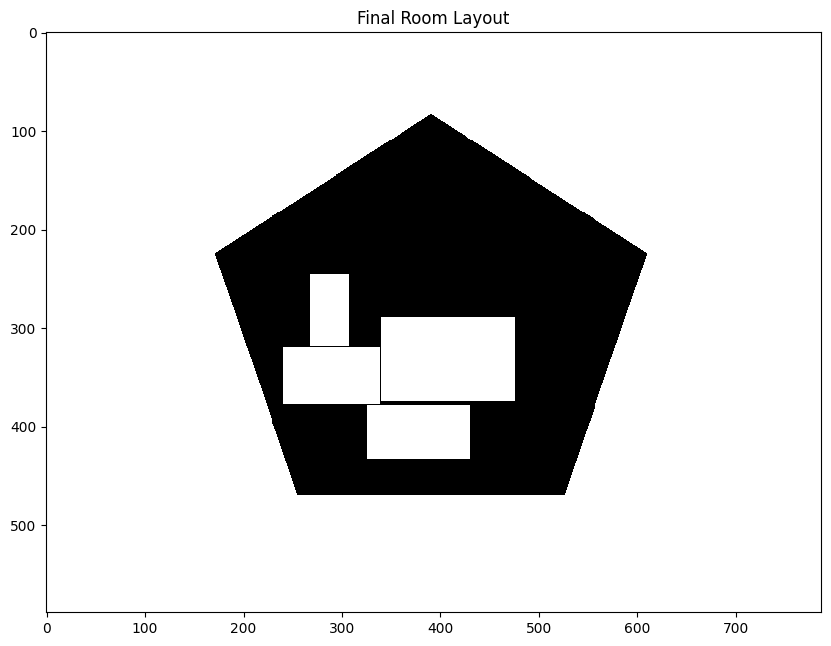

{'living room': {'vertex': (340, 290), 'length': 136, 'breadth': 85}, 'passage': {'vertex': (241, 320), 'length': 98, 'breadth': 58}, 'kitchen': {'vertex': (326, 379), 'length': 105, 'breadth': 55}, 'bathroom': {'vertex': (268, 246), 'length': 40, 'breadth': 73}}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from pix_array import floorArray

# Function to find length and breadth with a fixed ratio
def find_length_breadth_fixed_ratio(area, skewness=1.6):
    breadth = int((area / skewness) ** 0.5)
    length = int(skewness * breadth)
    return length, breadth

# Function to check if a rectangle can be placed inside the plot
def is_rectangle_inside_plot(plot, vertex, length, breadth):
    x, y = vertex
    if x < 0 or y < 0 or x + length > plot.shape[1] or y + breadth > plot.shape[0]:
        return False
    for i in range(y, y + breadth):
        for j in range(x, x + length):
            if plot[i, j] == 0:
                return False
    return True

# Function to mark a room on the plot
def mark_room_on_plot(plot, vertex, length, breadth):
    x, y = vertex
    for i in range(y, y + breadth):
        for j in range(x, x + length):
            plot[i, j] = 0

# Function to get boundary coordinates of a rectangle
def get_boundary_coordinates(vertex, length, breadth):
    x, y = vertex
    left_boundary = [(x - 1, i) for i in range(y, y + breadth)]
    right_boundary = [(x + length, i) for i in range(y, y + breadth)]
    top_boundary = [(j, y - 1) for j in range(x, x + length)]
    bottom_boundary = [(j, y + breadth) for j in range(x, x + length)]
    return left_boundary, top_boundary, right_boundary, bottom_boundary

# Function to find a room position inside the plot
def find_room_position(plot, length, breadth, inside_coords, max_attempts=1000):
    for attempt in range(max_attempts):
        idx = random.randint(0, len(inside_coords) - 1)
        vertex = tuple(inside_coords[idx])
        if is_rectangle_inside_plot(plot, vertex, length, breadth):
            return vertex
    raise ValueError("Unable to find a valid position for the room within the maximum number of attempts.")

# Function to select a random boundary point
def select_random_boundary_point(boundaries):
    side = random.choice(['left', 'top', 'right', 'bottom'])
    if side == 'left':
        return random.choice(boundaries[0]), 'left'
    elif side == 'top':
        return random.choice(boundaries[1]), 'top'
    elif side == 'right':
        return random.choice(boundaries[2]), 'right'
    else:  # 'bottom'
        return random.choice(boundaries[3]), 'bottom'

# Function to adjust vertex for a given side
def adjust_vertex_for_side(vertex, side, length, breadth):
    x, y = vertex
    if side == 'left':
        return (x - length, y)
    elif side == 'top':
        return (x, y - breadth)
    elif side == 'right':
        return (x + 1, y)
    elif side == 'bottom':
        return (x, y + 1)

# Load the binary plot from the image
path = "/content/test_plot.png"
binary_plot = floorArray(path)
og_floor_array = np.copy(binary_plot)
plot_area = np.sum(binary_plot)

# Define room specifications
rooms = [
    {"name": "living room", "area_percentage": 0.10, "skewness": 1.6},
    {"name": "passage", "area_percentage": 0.05, "skewness": random.uniform(1.6, 2)},
    {"name": "kitchen", "area_percentage": 0.05, "skewness": random.uniform(1.6, 2)},
    {"name": "bathroom", "area_percentage": 0.025, "skewness": random.uniform(1.6, 2)},
    {"name": "bedroom", "area_percentage": 0.075, "skewness": random.uniform(1.6, 2)}
]

room_positions = {}
inside_coords = np.argwhere(binary_plot == 1)
boundary_points_passage = None
boundary_points_living_room = None

for room in rooms:
    room_area = plot_area * room["area_percentage"]
    length, breadth = find_length_breadth_fixed_ratio(room_area, room["skewness"])
    print(f"{room['name'].capitalize()} - Length: {length}, Breadth: {breadth}")

    try:
        if room["name"] == "living room":
            vertex = find_room_position(binary_plot, length, breadth, inside_coords)
            mark_room_on_plot(binary_plot, vertex, length, breadth)
            print(f"Vertex: {vertex}, Length: {length}, Breadth: {breadth}")
            room_positions[room["name"]] = {"vertex": vertex, "length": length, "breadth": breadth}
            left_boundary, top_boundary, right_boundary, bottom_boundary = get_boundary_coordinates(vertex, length, breadth)
            boundary_points_living_room = (left_boundary, top_boundary, right_boundary, bottom_boundary)

        elif room["name"] == "passage":
            if boundary_points_living_room is None:
                raise ValueError("Boundary points for the living room are not set.")

            for attempt in range(10000):
                boundary_vertex, side = select_random_boundary_point(boundary_points_living_room)

                if random.choice([True, False]):
                    new_length, new_breadth = length, breadth
                else:
                    new_length, new_breadth = breadth, length

                adjusted_vertex = adjust_vertex_for_side(boundary_vertex, side, new_length, new_breadth)
                if is_rectangle_inside_plot(binary_plot, adjusted_vertex, new_length, new_breadth):
                    mark_room_on_plot(binary_plot, adjusted_vertex, new_length, new_breadth)
                    print(f"New Vertex: {adjusted_vertex}, New Length: {new_length}, New Breadth: {new_breadth}")
                    room_positions[room["name"]] = {"vertex": adjusted_vertex, "length": new_length, "breadth": new_breadth}
                    left_boundary, top_boundary, right_boundary, bottom_boundary = get_boundary_coordinates(adjusted_vertex, new_length, new_breadth)
                    boundary_points_passage = (left_boundary, top_boundary, right_boundary, bottom_boundary)
                    break
            else:
                print(f"Unable to place the {room['name']} at any selected boundary vertex within the maximum attempts.")

        else:
            if boundary_points_passage is None:
                raise ValueError("Boundary points for the passage are not set.")

            for attempt in range(10000):
                boundary_vertex, side = select_random_boundary_point(boundary_points_passage)

                if random.choice([True, False]):
                    new_length, new_breadth = length, breadth
                else:
                    new_length, new_breadth = breadth, length

                adjusted_vertex = adjust_vertex_for_side(boundary_vertex, side, new_length, new_breadth)
                if is_rectangle_inside_plot(binary_plot, adjusted_vertex, new_length, new_breadth):
                    mark_room_on_plot(binary_plot, adjusted_vertex, new_length, new_breadth)
                    print(f"New Vertex: {adjusted_vertex}, New Length: {new_length}, New Breadth: {new_breadth}")
                    room_positions[room["name"]] = {"vertex": adjusted_vertex, "length": new_length, "breadth": new_breadth}
                    break
            else:
                print(f"Unable to place the {room['name']} at any selected boundary vertex within the maximum attempts.")
    except ValueError as e:
        print(e)

# Save the final plot as a 2D array
np.savetxt('final_plot.txt', binary_plot, fmt='%d')

# Visualize the plot using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(binary_plot, cmap='gray_r', interpolation='nearest')
plt.title('Final Room Layout')
plt.show()

print(room_positions)


# Slope Fitness Function

In [ ]:
#TODO : Add co-ordinate check also after checking the slopes ; there might be parallel lines.

def check_connection(room1,room2,room_list):
    # room = {"name": "Living Room", "position": (0, 0), "size": (0, 1)}
    # room_list = [{"name": "Living Room", "position": (0, 0), "size": (0, 1)}, {"name": "Bedroom1", "position": (0, 0), "size": (0, 1)}]
    room1_x = room1['position'][0]
    room1_y = room1['position'][1]
    room1_width = room1['size'][0]
    room1_height = room1['size'][1]

    coords1 = [(room1_x, room1_y), (room1_x + room1_width, room1_y), (room1_x + room1_width, room1_y + room1_height), (room1_x, room1_y + room1_height)]


    room_slopes1 = [(coords1[1][1] - coords1[0][1]) / (coords1[1][0] - coords1[0][0]), (coords1[2][1] - coords1[1][1]) / (coords1[2][0] - coords1[1][0]), (coords1[3][1] - coords1[2][1]) / (coords1[3][0] - coords1[2][0]), (coords1[0][1] - coords1[3][1]) / (coords1[0][0] - coords1[3][0])]

    room2_x = room2['position'][0]
    room2_y = room2['position'][1]

    room2_width = room2['size'][0]
    room2_height = room2['size'][1]

    coords2 = [(room2_x, room2_y), (room2_x + room2_width, room2_y), (room2_x + room2_width, room2_y + room2_height), (room2_x, room2_y + room2_height)]

    room_slopes2 = [(coords2[1][1] - coords2[0][1]) / (coords2[1][0] - coords2[0][0]), (coords2[2][1] - coords2[1][1]) / (coords2[2][0] - coords2[1][0]), (coords2[3][1] - coords2[2][1]) / (coords2[3][0] - coords2[2][0]), (coords2[0][1] - coords2[3][1]) / (coords2[0][0] - coords2[3][0])]


    for i in range(4):
        for j in range(4):
            if room_slopes1[i] == room_slopes2[j]:
                return True

    return False


# Fitness considering Skewness

In [ ]:
import numpy as np

# Perfect aspect ratios for each room type
perfect_aspect_ratios = {
    "living room": random.uniform(1.4,1.8)
    "passage": random.uniform(1.6,2),
    "kitchen": random.uniform(1.6,2),
    "bathroom":random.uniform(1.6,2),
    "bedroom1": random.uniform(1..6,2)
}

def calculate_aspect_ratio(length, breadth):
    if length == 0 or breadth == 0:
        return 0
    return max(length / breadth, breadth / length)

def skewness(room_list):
    fitness = 0
    for room in room_list:
        room_name = room["name"].lower()
        length, breadth = room["size"]
        aspect_ratio = calculate_aspect_ratio(length, breadth)

        if room_name in perfect_aspect_ratios:
            perfect_ratio = perfect_aspect_ratios[room_name]
            deviation = abs(aspect_ratio - perfect_ratio)
            fitness += 1 / (1 + deviation)

    return fitness / len(room_list)

# Example input
room_list = [{"name": "Living Room", "position": (0, 0), "size": (1, 1)}, {"name": "Bedroom1", "position": (0, 0), "size": (1, 1.8)}]

fitness_value = skewness(room_list)
print("Skewness", fitness_value)


Skewness 0.8125


# Fitness Considering Distribution

In [ ]:
import numpy as np

def calculate_room_center(position, size):
    x, y = position
    length, breadth = size
    center_x = x + length / 2
    center_y = y + breadth / 2
    return center_x, center_y

def calculate_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def fitness_function_distribution(room_list, plot_centroid):
    distances = []
    for room in room_list:
        room_center = calculate_room_center(room["position"], room["size"])
        distance = calculate_distance(room_center, plot_centroid)
        distances.append(distance)

    # Calculate the mean distance and standard deviation of distances
    mean_distance = np.mean(distances)
    std_distance = np.std(distances)

    # Fitness is inversely proportional to the standard deviation of distances
    fitness = 1 / (1 + std_distance)  # The lower the std dev, the higher the fitness

    return fitness

# Example input
room_list = [
    {"name": "Living Room", "position": (2, 3), "size": (6, 4)},
    {"name": "Bedroom1", "position": (10, 8), "size": (5, 3)},
    {"name": "Kitchen", "position": (6, 5), "size": (4, 4)}
]

plot_centroid = (8, 6)  # Example centroid of the plot

fitness_value = fitness_function_distribution(room_list, plot_centroid)
print("Fitness Value:", fitness_value)


# Fitness considering Slant Walls (Irregularity 2)

In [ ]:
def get_slopes(room1,room2,room_list):
    # room = {"name": "Living Room", "position": (0, 0), "size": (0, 1)}
    # room_list = [{"name": "Living Room", "position": (0, 0), "size": (0, 1)}, {"name": "Bedroom1", "position": (0, 0), "size": (0, 1)}]
    room1_x = room1['position'][0]
    room1_y = room1['position'][1]
    room1_width = room1['size'][0]
    room1_height = room1['size'][1]

    coords1 = [(room1_x, room1_y), (room1_x + room1_width, room1_y), (room1_x + room1_width, room1_y + room1_height), (room1_x, room1_y + room1_height)]


    room_slopes1 = [(coords1[1][1] - coords1[0][1]) / (coords1[1][0] - coords1[0][0]), (coords1[2][1] - coords1[1][1]) / (coords1[2][0] - coords1[1][0]), (coords1[3][1] - coords1[2][1]) / (coords1[3][0] - coords1[2][0]), (coords1[0][1] - coords1[3][1]) / (coords1[0][0] - coords1[3][0])]

    return room_slopes1


def slant_fitness(room_list):
    irregularity = 0
    for room in room_list:
        room_slopes = get_slopes(room,room,room_list)
        for i in range(4):
            if room_slopes[i] != 1 or room_slopes[i] != -1 or room_slopes[i] != 0:
                irregularity += 1
    return 4*len(room_list) - irregularity

In [ ]:
binary_plot = np.loadtxt('/content/final_plot.txt', dtype=int)

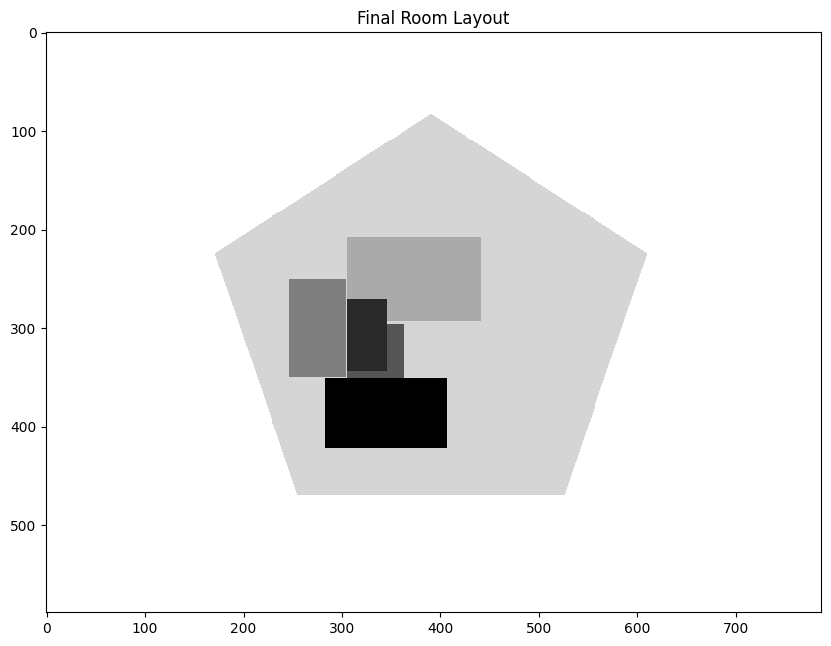

{'living room': {'vertex': (340, 290), 'length': 136, 'breadth': 85}, 'passage': {'vertex': (241, 320), 'length': 98, 'breadth': 58}, 'kitchen': {'vertex': (326, 379), 'length': 105, 'breadth': 55}, 'bathroom': {'vertex': (268, 246), 'length': 40, 'breadth': 73}}


In [ ]:
# Visualize the plot using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(binary_plot, cmap='gray_r', interpolation='nearest')
plt.title('Final Room Layout')
plt.show()

print(room_positions)

Centroid of the plot: [295.48111487 390.49556817]
Centroid of the plot (rounded): [295 390]
